In [1]:
import tensorflow as tf 
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
RANDOM_SEED = 42

In [98]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
#sample_df = pd.read_csv('datatset/sample_submission.csv')

In [99]:
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [101]:
train_df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

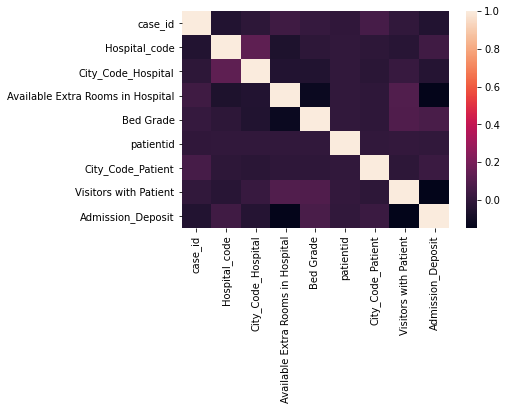

In [102]:
sns.heatmap(train_df.corr())

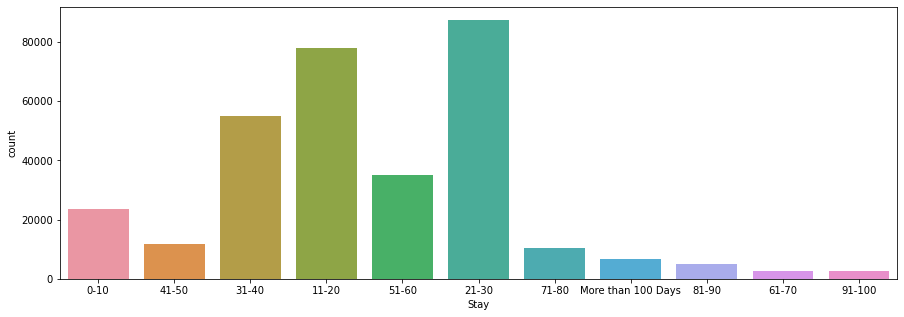

In [103]:
plt.figure(figsize=(15,5))
sns.countplot(train_df['Stay'])

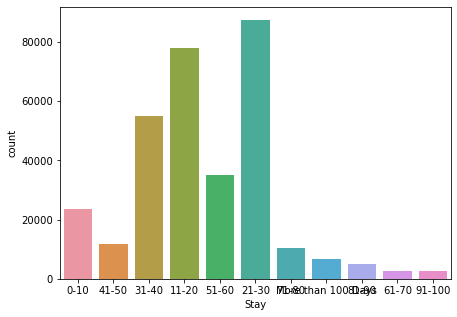

In [104]:
plt.figure(figsize=(7,5))
sns.countplot(train_df['Stay'])

In [105]:
train_new = train_df.dropna()

In [106]:
test_df['Bed Grade'] = test_df['Bed Grade'].fillna(float(test_df['Bed Grade'].mode()))
test_df['City_Code_Patient'] = test_df['City_Code_Patient'].fillna(float(test_df['City_Code_Patient'].mode()))
test_new = test_df.dropna()

In [107]:
train_new.drop(columns=['case_id','Hospital_code','patientid','City_Code_Hospital','Hospital_region_code'],inplace=True)
test_new.drop(columns=['case_id','Hospital_code','patientid','City_Code_Hospital','Hospital_region_code'],inplace=True)

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
train_new.head()

,Hospital_type_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,c,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,c,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,e,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,b,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,b,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [110]:
le_hos_type = LabelEncoder()
le_dpt = LabelEncoder()
le_ward_type = LabelEncoder()
le_ward_fac = LabelEncoder()
le_type_add = LabelEncoder()
le_severity = LabelEncoder()
le_age = LabelEncoder()
le_stay = LabelEncoder() 

train_new.iloc[:,0] = le_hos_type.fit_transform(train_new.iloc[:,0])
train_new['Department'] = le_dpt.fit_transform(train_new['Department'])
train_new['Ward_Type'] = le_ward_type.fit_transform(train_new['Ward_Type'])
train_new['Ward_Facility_Code'] = le_ward_fac.fit_transform(train_new['Ward_Facility_Code'])
train_new['Type of Admission'] = le_type_add.fit_transform(train_new['Type of Admission'])
train_new.iloc[:,8] = le_severity.fit_transform(train_new.iloc[:,8])
train_new['Age'] = le_age.fit_transform(train_new['Age'])
train_new['Stay'] = le_stay.fit_transform(train_new['Stay'])

In [111]:
test_new.iloc[:,0] = le_hos_type.transform(test_new.iloc[:,0])
test_new['Department'] = le_dpt.transform(test_new['Department'])
test_new['Ward_Type'] = le_ward_type.transform(test_new['Ward_Type'])
test_new['Ward_Facility_Code'] = le_ward_fac.transform(test_new['Ward_Facility_Code'])
test_new['Type of Admission'] = le_type_add.transform(test_new['Type of Admission'])
test_new.iloc[:,8] = le_severity.transform(test_new.iloc[:,8])
test_new['Age'] = le_age.transform(test_new['Age'])

In [112]:
x = train_new.drop('Stay',axis=1)
y = train_new['Stay'].values

In [113]:
from keras.utils import to_categorical
y_bin = to_categorical(y)

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
mm = MinMaxScaler()
x = mm.fit_transform(x)
x_test = mm.transform(test_new)

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_val,y_train,y_val = train_test_split(x,y_bin,test_size=0.2,random_state=RANDOM_SEED,stratify=y)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [24]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred_dt = dt.predict(x_val)
print(f'The Accuracy of Decision Tree Model is {accuracy_score(y_pred_dt,y_val)}')

The Accuracy of Decision Tree Model is 0.29555920266415975


In [26]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
y_pred_rf = rf.predict(x_val)
print(f"The accuracy of Random Forest Model is {accuracy_score(y_pred_rf,y_val)}")

The accuracy of Random Forest Model is 0.3805669306394302


In [28]:
knn  = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred_knn = knn.predict(x_val)
print(f"The Accuracy Score of K-Nearest Neighbors is {accuracy_score(y_pred_knn,y_val)}")

The Accuracy Score of K-Nearest Neighbors is 0.3060118867413439


In [118]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from livelossplot import PlotLossesKeras

In [119]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(512,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


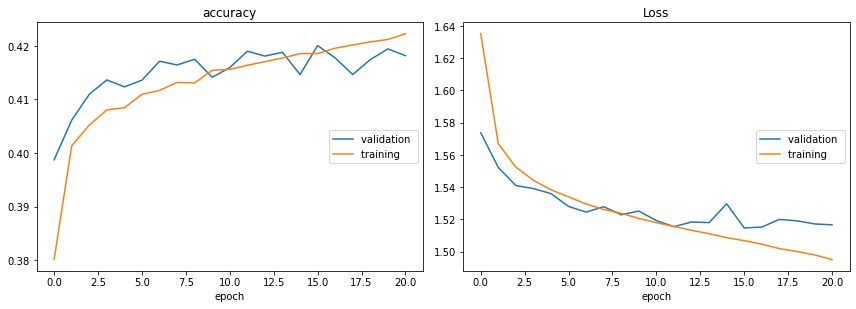

accuracy
	validation       	 (min:    0.399, max:    0.420, cur:    0.418)
	training         	 (min:    0.380, max:    0.422, cur:    0.422)
Loss
	validation       	 (min:    1.515, max:    1.574, cur:    1.517)
	training         	 (min:    1.495, max:    1.635, cur:    1.495)


In [120]:
h = model.fit(x_train,y_train,
                validation_data=(x_val,y_val),
                epochs=21,
                batch_size=128,
                callbacks = [PlotLossesKeras()])

In [121]:
test_smpl = pd.read_csv("dataset/test.csv")

In [122]:
y_test = model.predict_classes(x_test)
#y_test = np.argmax(y_test)
#y_test = np.reshape(y_test,(1))
y_test = le_stay.inverse_transform(y_test)
sub = pd.DataFrame({'case_id':test_smpl.case_id,'Stay':y_test})
sub.to_csv('Submission.csv',index=False)